# TP 4 Clustering de données

<p>
Le but de ce TP est de créer une fonction Python capable de détecter des clusters de données homogènes dans un ensemble de données, puis d’analyser un jeu de données réelles.
</p>
## A) K-Moyennes :

***

### Écrivez en python l’algorithme des K-Moyennes sous la forme d’une fonction. Vous trouverez une description de l’algorithme dans le cours ou sur internet. La fonction prend en entrée deux paramètres : la matrice des données et le nombre de clusters que l’on souhaite. Testez sur les données Iris ou sur des données que vous générez. Comparez avec la fonction Kmeans de sklearn.

### Importing Libraries and Loading Datasets

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.metrics.pairwise import euclidean_distances

iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [4]:
import random

def dist(x,y):
    return [[ np.sqrt(np.sum((xi-yi)**2)) for yi in y] for xi in x]

def K_Moyennes(X, K):
    try:
        k_centroids = random.choices(X, k=K)
        cluster_labels = []
        while True:
            # distance = euclidean_distances(X, k_centroids)
            distance = dist(X, k_centroids)
            cluster_labels = [np.argmin(dist) for dist in distance]
            distance_matrix = [ [ x for i, x in enumerate(X) if cluster_labels[i] == k ] for k in range(K) ]

            for X_K in distance_matrix:
                if not X_K :
                    raise Exception("\nError")
                    
            new_k_centroids = [ np.mean( a = X_K, axis = 0 )  for X_K in distance_matrix ]

            if np.array_equal(new_k_centroids, k_centroids):
                break
            else :
                k_centroids = new_k_centroids
        return cluster_labels
    except:
        return K_Moyennes(X, K)

K_Moyennes(X, 3)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1]

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

### Expérimenter l’instabilité due à l’initialisation : les centres des clusters étant choisis au hasard lors de l’initialisation, le résultat obtenu peut varier d’une exécution à l’autre. Vérifiez que c’est le cas.

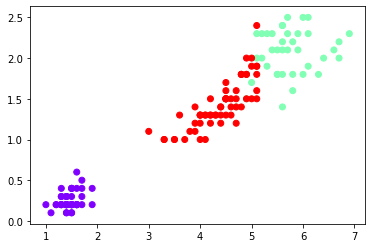

In [6]:


plt.scatter(X[:,2],X[:,3], c=K_Moyennes(X, 3), cmap='rainbow')

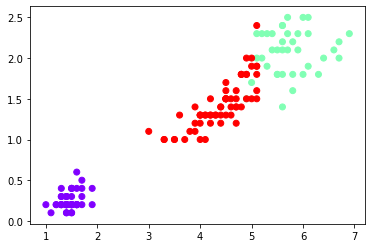

In [32]:
plt.scatter(X[:,2],X[:,3], c=K_Moyennes(X, 3), cmap='rainbow')

### Utiliser l’indice de Silhouette (qui est dans le package sklearn) pour stabiliser les résultats et sélectionner automatiquement le nombre de groupes. Pour ce faire, créez un script qui applique K-moyenne sur les données pour différents nombres de clusters allant de 2 à 10, 10 fois pour chaque nombre de clusters (soit 90 fois en tout) et qui renvoie la solution ayant le meilleur score de Silhouette.

In [30]:
from tqdm import tqdm
scores = []
for k in tqdm(range(2,11)):

    for i in range(10):
        cluster_labels = K_Moyennes(X, k)
        scores.append( metrics.silhouette_score(X, cluster_labels) )

print('\n\nMeilleur score de Silhouette pour 90 iteration est : ', np.max(scores), "Pour k = ", int(np.argmax(scores) / 10) + 2)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:07<00:00,  1.19it/s]



Meilleur score de Silhouette pour 90 iteration est :  0.681046169211746 Pour k =  2


### Utiliser une ACP (fonction PCA de sklearn) pour vérifier visuellement la cohérence des groupes obtenus. Vérifier aussi visuellement la séparabilité et la compacité de ces groupes à l’aide d’une ADL (fonction LinearDiscriminantAnalysis de sklearn).

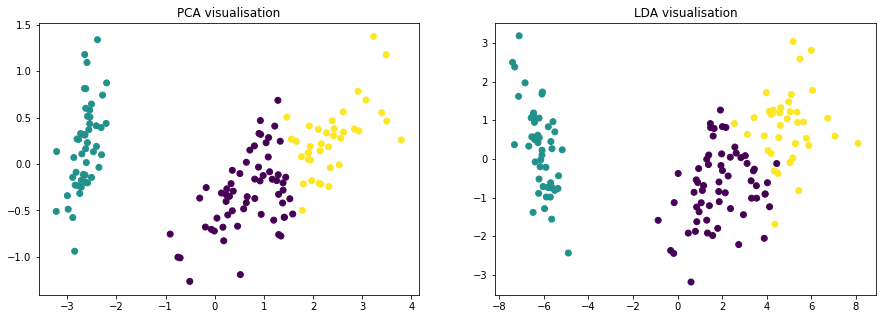

In [32]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 5)

cluster_labels = K_Moyennes(X, 3)

PCA = PCA(n_components=2)
dataPCA = PCA.fit_transform(X)

plt.subplot(1, 2, 1)
plt.scatter(dataPCA[:,0], dataPCA[:,1], c=cluster_labels)
plt.title('PCA visualisation')


LDA = LDA(n_components=2)
dataLDA = LDA.fit(X, cluster_labels).transform(X)

plt.subplot(1, 2, 2)
plt.title('LDA visualisation')
plt.scatter(dataLDA[:, 0], dataLDA[:, 1], c=cluster_labels, cmap='viridis')

plt.show()


####  Quelle est la différence entre les deux méthodes ?

<p>
Le LDA et le PCA sont des techniques de transformation linéaire: le LDA est un supervisé tandis que le PCA non supervisé - le PCA ignore les étiquettes de classe.

Nous pouvons imaginer l'ACP comme une technique qui trouve les directions de la variance maximale.
(L'ACP a tendance à entraîner de meilleurs résultats de classification dans une tâche de reconnaissance d'image si le nombre d'échantillons pour une classe donnée était relativement faible.)

Contrairement à PCA, LDA tente de trouver un sous-espace de fonctionnalités qui maximise la séparabilité des classes.
LDA fait des hypothèses sur les classes normalement distribuées et les covariances de classe égales.
</p>

## B) Analyse des données « choix projet » :
<p>
Les données choixprojetstab.csv contiennent des données anonymisées de voeux faits par les
étudiant·e·s du master 2 pour des projets à réaliser en binômes. Chaque étudiant·e a fait des voeux
sur les differents projets en leur donnant une mention très bien, bien ou jamais. Les projets non
mentionnés peuvent être considérés comme « moyens » et on peut dire que très bien = 3, bien = 2,
moyens = 1, jamais = 0. L’objectif est de former des clusters d’étudiant·e·s ayant faits des choix
similaires.
</P>

***

### Utilisez le package csv (ou l’importation de variable de Spyder) pour lire le fichier et remplir deux variables : la liste des codes « C » représentant les étudiant (première colonne) et la matrice « M » des données (tout sauf la première ligne et la première colonne). La matrice M doit être de type array du package numpy. Faites attentions à ce que les valeurs dans M soient bien numériques (1, 2, 3) et non textuelle (‘1’, ‘2’, ‘3’). Vous pouvez utiliser la méthode astype de numpy en cas de besoin.

In [1]:
import csv
import numpy as np
with open('choixprojetstab.csv', newline='', encoding='utf-8') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    rows = np.asarray([row for row in csv_reader])
    C = np.array( rows[1:,0] )
    M = np.array( rows[1:,1:] ).astype(int)

    # print(C)
    print(M.shape,"\n", M)



(71, 80) 
 [[1 1 1 ... 1 1 3]
 [1 1 1 ... 1 1 1]
 [0 0 0 ... 1 0 0]
 ...
 [1 1 1 ... 1 0 2]
 [1 1 0 ... 1 1 1]
 [1 1 1 ... 0 1 1]]


In [2]:
import pandas as pd

df = pd.read_csv('choixprojetstab.csv', delimiter=';', encoding='utf-8')
df.head()

,étudiant·e,ga.vTZVmBFaC.,ga/mLSm4ai/6g,ga04b5zeP48qY,ga1ohIKbe4v9Y,ga2f3zAu/j5w6,ga2tObQKD38MQ,ga5EltwHBOBQU,ga5Go./f4ADBQ,ga5JTmKLpYzns,...,gatfjwrAzu3Fk,gatgLz1yg7ZAg,gavTOkC.twsSQ,gaw2dFU/DFhQo,gawAIBKObOA9Q,gawIG8K0tl6Dg,gaxRM/r6FWnFA,gaxvvLjHn0mEE,gay0.j6cCUFM.,gazuii0BJkiyo
0,bl/.vSDYCGrSs,1,1,1,1,1,3,1,2,2,...,2,1,3,3,1,2,1,1,1,3
1,bl/1NiMubceBs,1,1,1,1,1,3,1,1,1,...,1,1,1,3,2,1,2,1,1,1
2,bl/dvgMTLVSvk,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,bl1NWhKcNADF2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,bl1ao5B7htJfQ,1,1,0,1,0,0,0,0,0,...,2,0,1,0,3,0,0,0,0,2


### Dans sklearn.cluster il existe différents algorithmes de clustering. Testez les différents algorithmes du package et proposez le meilleur clustering possible des données selon l’indice Silhouette.

In [33]:
import numpy as np
from sklearn import cluster
from sklearn import metrics

# 'très bien' = 3, 'bien' = 2, 'moyens' = 1, 'jamais' = 0

# ============
# Create cluster objects
# ============
two_means = cluster.MiniBatchKMeans(n_clusters= 4)
affinity_propagation = cluster.AffinityPropagation(damping=.9, preference=-200)
birch = cluster.Birch(n_clusters= 4)
gmm = mixture.GaussianMixture( n_components= 2, covariance_type='full')
kmeans = cluster.KMeans(n_clusters=4)

clustering_algorithms = (
        ('Kmeans' , kmeans),
        ('MiniBatchKMeans', two_means),
        ('AffinityPropagation', affinity_propagation),
        ('Birch', birch),
        ('GaussianMixture', gmm)  
    )

for name, algorithm in clustering_algorithms:

    cluster_labels = algorithm.fit_predict(M)

    score = metrics.silhouette_score(M, cluster_labels)

    print("> silhouette_score = ", score, "\t with :  "+name)
    



> silhouette_score =  0.2965217736501023 	 with :  Kmeans
> silhouette_score =  0.19181871912051895 	 with :  MiniBatchKMeans
> silhouette_score =  0.24603465972457622 	 with :  AffinityPropagation
> silhouette_score =  0.2905635020378965 	 with :  Birch
> silhouette_score =  0.25270656690459653 	 with :  GaussianMixture
